In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import warnings, os

In [12]:
warnings.filterwarnings("ignore")
os.getcwd()

'/Users/marcelloferreira/Library/Mobile Documents/com~apple~CloudDocs/Desktop/LONDON'

In [13]:
# Run preprocessing
%run 'preprocessing.ipynb'
%run 'evaluation.ipynb'

In [14]:
# Define and Train the Neural Network
def build_and_train_nn(X_train, X_test, y_train, y_test,test_size):
    # Define the binary classification neural network
    model = Sequential([
        Dense(64, input_dim=X_train.shape[1], activation='relu'),  # Input + first hidden layer
        Dropout(0.3),                                              # Dropout for regularization
        Dense(32, activation='relu'),                              # Second hidden layer
        Dropout(0.3),                                              # Dropout for regularization
        Dense(1, activation='sigmoid')                             # Output layer for binary classification
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',  # Binary classification loss
              metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, validation_split=test_size, epochs=30, batch_size=32)
    
    return model, history

In [15]:
# Define the improved neural network
def build_and_train_improved_nn(X_train, X_test, y_train, y_test,test_size):
    # Define the model
    model = Sequential([
        Dense(128, input_dim=X_train.shape[1], activation='relu'),  # Input layer + first hidden layer
        BatchNormalization(),                                      # Batch normalization
        Dropout(0.2),                                              # Dropout for regularization
        Dense(64, activation='relu'),                              # Second hidden layer
        BatchNormalization(),                                      # Batch normalization
        Dropout(0.2),                                              # Dropout for regularization
        Dense(16, activation='relu'),                              # Third hidden layer
        BatchNormalization(),                                      # Batch normalization
        Dropout(0.2),                                              # Dropout for regularization
        Dense(1, activation='sigmoid')                             # Output layer for binary classification
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0005), 
                  loss='binary_crossentropy',  # Binary classification loss
                  metrics=['accuracy'])

    # Define early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

    # Train the model
    history = model.fit(X_train, y_train, 
                        validation_split=test_size, 
                        epochs=30, 
                        batch_size=64, 
                        callbacks=[early_stopping], 
                        verbose=1)

    return model, history

In [16]:
# Define the further optimized neural network
def further_optimized_nn(X_train, X_test, y_train, y_test,test_size):
    
    # Define the model
    model = Sequential([
        Dense(128, input_dim=X_train.shape[1], activation='relu'),  # Input layer + first hidden layer
        BatchNormalization(),                                      # Batch normalization
        Dropout(0.15),                                             # Dropout for regularization
        Dense(64, activation='relu'),                              # Second hidden layer
        BatchNormalization(),                                      # Batch normalization
        Dropout(0.15),                                             # Dropout for regularization
        Dense(32, activation='relu'),                              # Third hidden layer
        BatchNormalization(),                                      # Batch normalization
        Dropout(0.15),                                             # Dropout for regularization
        Dense(1, activation='sigmoid')                             # Output layer for binary classification
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='binary_crossentropy',  # Binary classification loss
                  metrics=['accuracy'])

    # Define callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

    # Train the model
    history = model.fit(X_train, y_train, 
                        validation_split=test_size, 
                        epochs=50, 
                        batch_size=64, 
                        callbacks=[early_stopping, reduce_lr], 
                        verbose=1)

    return model, history

Epoch 1/30
56/56 [==============================] - 0s 3ms/step - loss: 0.6127 - accuracy: 0.6654 - val_loss: 0.4559 - val_accuracy: 0.8073
Epoch 2/30
56/56 [==============================] - 0s 1ms/step - loss: 0.3991 - accuracy: 0.8465 - val_loss: 0.3585 - val_accuracy: 0.8611
Epoch 3/30
56/56 [==============================] - 0s 1ms/step - loss: 0.3284 - accuracy: 0.8723 - val_loss: 0.3302 - val_accuracy: 0.8755
Epoch 4/30
56/56 [==============================] - 0s 1ms/step - loss: 0.3170 - accuracy: 0.8785 - val_loss: 0.3156 - val_accuracy: 0.8820
Epoch 5/30
56/56 [==============================] - 0s 1ms/step - loss: 0.2975 - accuracy: 0.8909 - val_loss: 0.3117 - val_accuracy: 0.8860
Epoch 6/30
56/56 [==============================] - 0s 1ms/step - loss: 0.2842 - accuracy: 0.8965 - val_loss: 0.3089 - val_accuracy: 0.8873
Epoch 7/30
56/56 [==============================] - 0s 1ms/step - loss: 0.2867 - accuracy: 0.8971 - val_loss: 0.3067 - val_accuracy: 0.8925
Epoch 8/30
56/56 [==

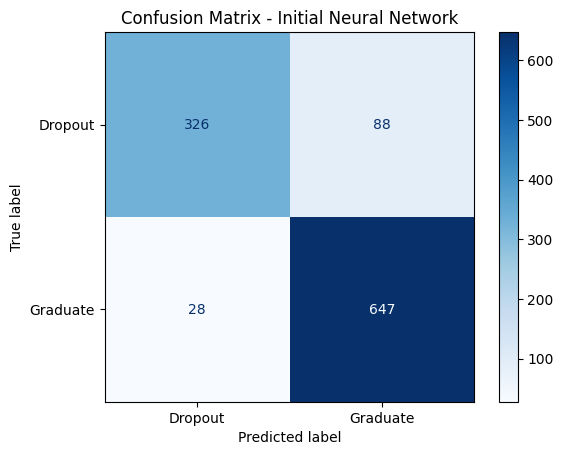


     ____________________________________________
    | Class      | Precision | Recall | F1-Score |
    |------------|-----------|--------|----------|
    | Dropout    | 0.92      | 0.79   | 0.85     |
    | Graduate   | 0.88      | 0.96   | 0.92     |
    |------------|-----------|--------|----------|
    | Accuracy   | 0.89      |          
    | ROC-AUC    | 0.873     |            
    --------------------------
    


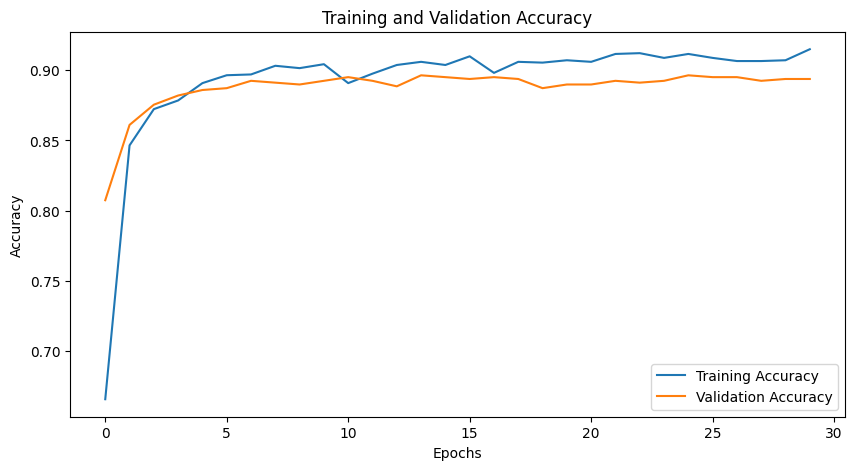

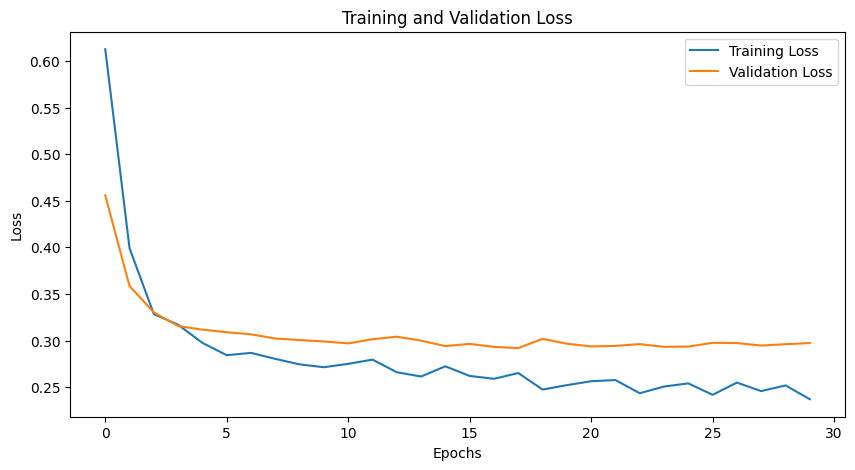

In [17]:
# Preprocessing
test_size = 0.3
X_train, X_test, y_train, y_test = preprocessing(test_size, False)

# Build and train the initial model
model, history = build_and_train_nn(X_train, X_test, y_train, y_test,test_size)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Evaluate the model
model_name = 'Initial Neural Network'
print(eval_model_generate_markdown(y_test, y_pred, model_name))

# Plot training and validation accuracy
plot_accuracy_loss(history,model_name)

Epoch 1/30
28/28 [==============================] - 1s 6ms/step - loss: 0.6183 - accuracy: 0.6783 - val_loss: 0.5740 - val_accuracy: 0.7903
Epoch 2/30
28/28 [==============================] - 0s 2ms/step - loss: 0.4362 - accuracy: 0.8116 - val_loss: 0.5034 - val_accuracy: 0.8467
Epoch 3/30
28/28 [==============================] - 0s 2ms/step - loss: 0.3878 - accuracy: 0.8476 - val_loss: 0.4480 - val_accuracy: 0.8650
Epoch 4/30
28/28 [==============================] - 0s 2ms/step - loss: 0.3582 - accuracy: 0.8583 - val_loss: 0.4053 - val_accuracy: 0.8716
Epoch 5/30
28/28 [==============================] - 0s 4ms/step - loss: 0.3365 - accuracy: 0.8650 - val_loss: 0.3757 - val_accuracy: 0.8768
Epoch 6/30
28/28 [==============================] - 0s 2ms/step - loss: 0.3254 - accuracy: 0.8813 - val_loss: 0.3544 - val_accuracy: 0.8781
Epoch 7/30
28/28 [==============================] - 0s 2ms/step - loss: 0.3072 - accuracy: 0.8808 - val_loss: 0.3352 - val_accuracy: 0.8847
Epoch 8/30
28/28 [==

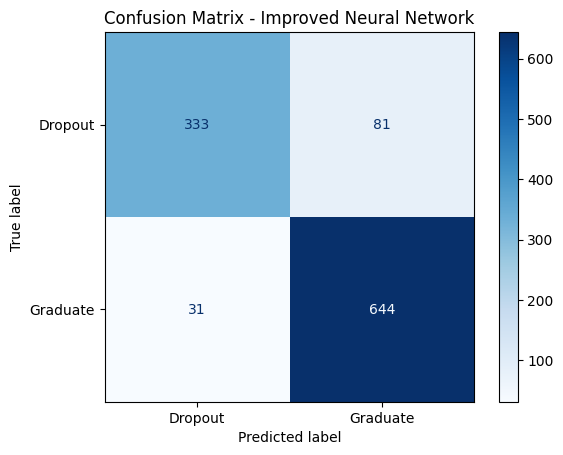


     ____________________________________________
    | Class      | Precision | Recall | F1-Score |
    |------------|-----------|--------|----------|
    | Dropout    | 0.91      | 0.80   | 0.86     |
    | Graduate   | 0.89      | 0.95   | 0.92     |
    |------------|-----------|--------|----------|
    | Accuracy   | 0.90      |          
    | ROC-AUC    | 0.879     |            
    --------------------------
    


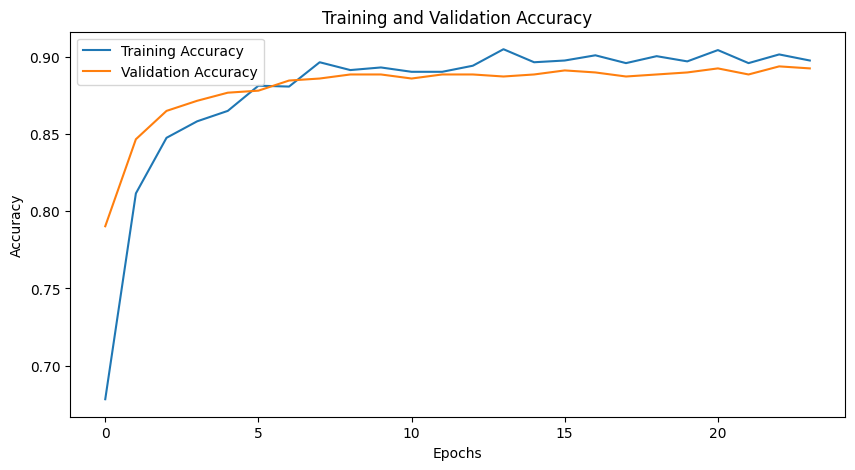

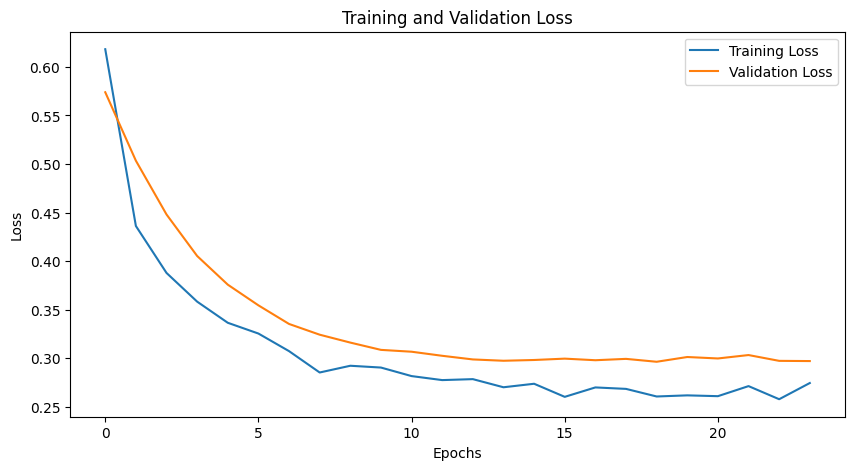

In [18]:
# Preprocessing
test_size = 0.3
X_train, X_test, y_train, y_test = preprocessing(test_size, False)

# Build and train the improved model
model_name = 'Improved Neural Network'
model, history = build_and_train_improved_nn(X_train, X_test, y_train, y_test,test_size)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Evaluate the model
print(eval_model_generate_markdown(y_test, y_pred, model_name))

# Plot training and validation accuracy
plot_accuracy_loss(history,model_name)

Epoch 1/50
28/28 [==============================] - 1s 6ms/step - loss: 0.4635 - accuracy: 0.7958 - val_loss: 0.4906 - val_accuracy: 0.8729 - lr: 0.0010
Epoch 2/50
28/28 [==============================] - 0s 2ms/step - loss: 0.3253 - accuracy: 0.8633 - val_loss: 0.4086 - val_accuracy: 0.8702 - lr: 0.0010
Epoch 3/50
28/28 [==============================] - 0s 2ms/step - loss: 0.2995 - accuracy: 0.8864 - val_loss: 0.3652 - val_accuracy: 0.8781 - lr: 0.0010
Epoch 4/50
28/28 [==============================] - 0s 2ms/step - loss: 0.2733 - accuracy: 0.8993 - val_loss: 0.3425 - val_accuracy: 0.8807 - lr: 0.0010
Epoch 5/50
28/28 [==============================] - 0s 2ms/step - loss: 0.2679 - accuracy: 0.8982 - val_loss: 0.3228 - val_accuracy: 0.8820 - lr: 0.0010
Epoch 6/50
28/28 [==============================] - 0s 2ms/step - loss: 0.2602 - accuracy: 0.9016 - val_loss: 0.3100 - val_accuracy: 0.8899 - lr: 0.0010
Epoch 7/50
28/28 [==============================] - 0s 2ms/step - loss: 0.2438 - a

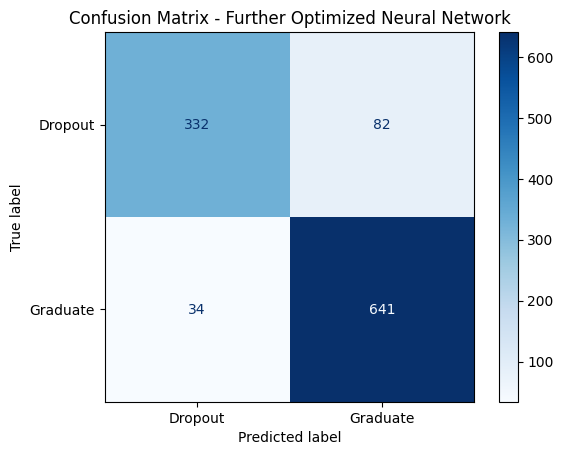


     ____________________________________________
    | Class      | Precision | Recall | F1-Score |
    |------------|-----------|--------|----------|
    | Dropout    | 0.91      | 0.80   | 0.85     |
    | Graduate   | 0.89      | 0.95   | 0.92     |
    |------------|-----------|--------|----------|
    | Accuracy   | 0.89      |          
    | ROC-AUC    | 0.876     |            
    --------------------------
    


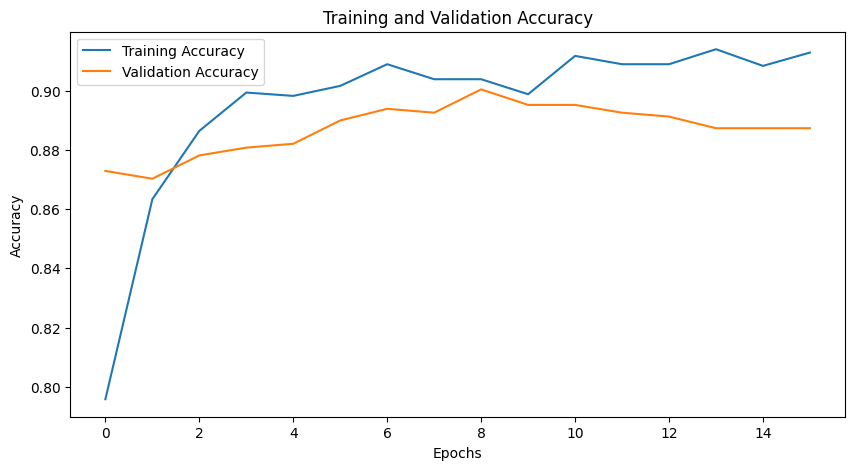

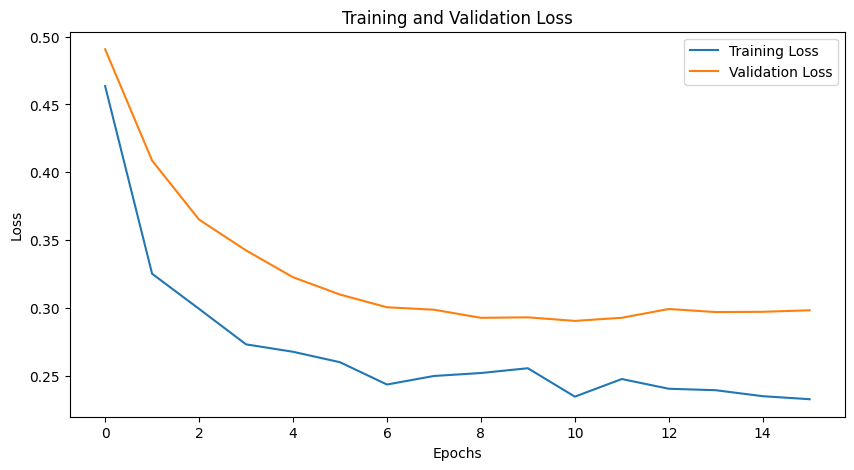

In [19]:
# Build and train the improved model
model_name = 'Further Optimized Neural Network'
model, history = further_optimized_nn(X_train, X_test, y_train, y_test,test_size)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Evaluate the model
print(eval_model_generate_markdown(y_test, y_pred,model_name))

# Plot training and validation accuracy
plot_accuracy_loss(history,model_name)